Snippet to find the number of requests per year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import listdir
from os.path import isfile, join

%matplotlib inline

In [71]:
# Read in the files
counter = 0
df = {}   # Dataframe of dataframes

mypath = 'data/files/'

for file in listdir(mypath):
    f = join(mypath, file)
    if isfile(f):
        df[counter] = pd.read_csv(f, encoding='utf-8')
        counter += 1

In [72]:
len(df)

26

In [73]:
df[0].head()

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,98001,Personal Information,Public,"GWA file, specifically agreements, cheques and...",All disclosed,0
1,98002,General Information,Public,Records related to construction on {company na...,Partly non-existent,1
2,98003,General Information,Business,Information regarding damage to Regional facil...,Partly non-existent,2
3,98004,General Information,Individual by Agent,Identity of the Sunnyside Home employee who wi...,Nothing disclosed,3
4,98005,Personal Information,Public,Regional Solicitor's file for {name removed} r...,Partly exempted,4


In [74]:
for y in range(0, len(df)):
    print(df[y].shape)

(22, 6)
(27, 6)
(23, 6)
(41, 6)
(33, 6)
(24, 6)
(43, 6)
(22, 6)
(22, 6)
(29, 6)
(30, 6)
(19, 6)
(25, 6)
(43, 6)
(24, 6)
(82, 6)
(20, 6)
(39, 6)
(30, 6)
(17, 6)
(26, 6)
(68, 6)
(53, 6)
(26, 6)
(54, 6)
(60, 6)


In [76]:
for i in range(0, len(df)):
    for j in range(0, df[0].shape[1]):
        df[i].columns.values[j] = df[i].columns.values[j].strip(' :')

In [77]:
# Make a single dataframe
adf = pd.concat(df, ignore_index=True)

In [78]:
adf.shape

(902, 6)

In [79]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 6 columns):
Request_Number        902 non-null int64
Request_Type          902 non-null object
Source                902 non-null object
Summary_of_Request    902 non-null object
Decision              902 non-null object
OBJECTID              902 non-null int64
dtypes: int64(2), object(4)
memory usage: 42.4+ KB


In [80]:
adf = adf.drop(columns=['OBJECTID'])

In [81]:
adf.head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,98001,Personal Information,Public,"GWA file, specifically agreements, cheques and...",All disclosed
1,98002,General Information,Public,Records related to construction on {company na...,Partly non-existent
2,98003,General Information,Business,Information regarding damage to Regional facil...,Partly non-existent


In [104]:
adf['Year'] = adf['Request_Number']

In [105]:
adf.head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Year
0,98001,Personal Information,Public,"GWA file, specifically agreements, cheques and...",All disclosed,98001
1,98002,General Information,Public,Records related to construction on {company na...,Partly non-existent,98002
2,98003,General Information,Business,Information regarding damage to Regional facil...,Partly non-existent,98003


In [106]:
# Replace year by either 1990 something using 19 + the first two characters of the Request_Number
# Or if year is 2000 and something, take the first 4 characters of the Request_Number
for line in range(0, len(adf)):
    if len(str(adf['Request_Number'][line])) == 5:
        new_string = '19' + str(adf['Request_Number'][line])[:2]
        adf['Year'][line] = new_string
    else:
        adf['Year'][line] = str(adf['Request_Number'][line])[:4]

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
adf.head(10)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Year
0,98001,Personal Information,Public,"GWA file, specifically agreements, cheques and...",All disclosed,1998
1,98002,General Information,Public,Records related to construction on {company na...,Partly non-existent,1998
2,98003,General Information,Business,Information regarding damage to Regional facil...,Partly non-existent,1998
3,98004,General Information,Individual by Agent,Identity of the Sunnyside Home employee who wi...,Nothing disclosed,1998
4,98005,Personal Information,Public,Regional Solicitor's file for {name removed} r...,Partly exempted,1998
5,98006,General Information,Business,Tender and contract for wastewater treatment o...,Partly exempted,1998
6,98007,General Information,Business,Unit pricing (pages 24-28) of winning bid for ...,Nothing disclosed,1998
7,98008,Personal Information,Public,"GWA for {name removed} records from January 1,...",Partly non-existent,1998
8,98009,Personal Information,Public,Home Child Care Provider file for {name remove...,Partly exempted,1998
9,98010,Personal Information,Public,Income Maintenance file for {name removed} nar...,All disclosed,1998


In [108]:
adf.to_csv('data/csv/dataframe_year.csv', encoding='utf-8', index=False)

In [109]:
adf_groupby_Year = adf.groupby('Year').count()[['Decision']]
adf_groupby_Year

,Decision
Year,
1991,24
1992,55
1993,61
1994,68
1995,53
1996,26
1997,17
1998,22
1999,27


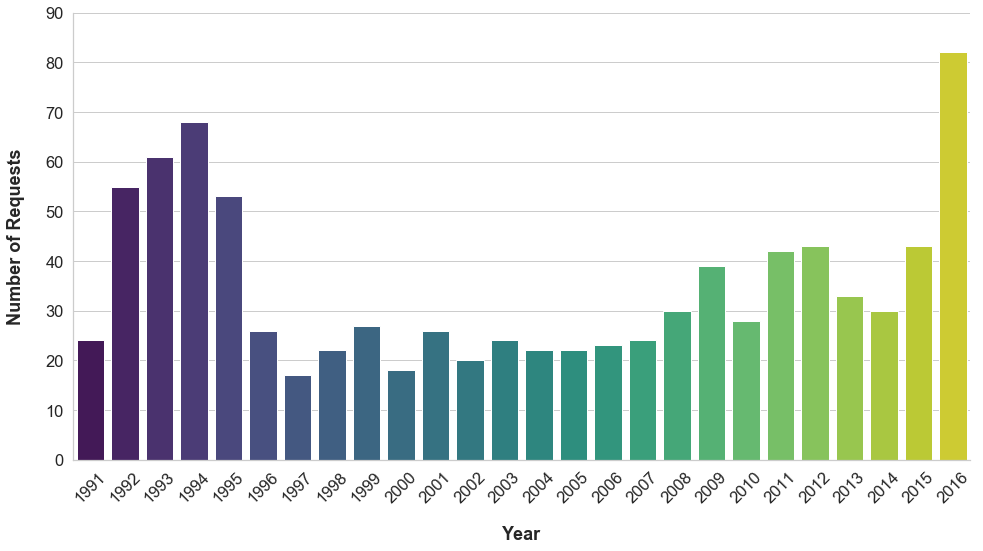

In [116]:
# Bar plot of all decisions made
columns = list(adf_groupby_Year.index)

fig, ax = plt.subplots(figsize=(14, 8))

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)
sns.despine()

ax = sns.barplot(x=columns, y='Decision', data=adf_groupby_Year, palette=("viridis"))
plt.ylabel('Number of Requests', fontweight='bold', fontsize=18, labelpad=20)
plt.xlabel('Year', fontweight='bold', fontsize=18, labelpad=20)
plt.xticks(rotation=45)
plt.ylim(0, 90)
plt.tight_layout()
plt.savefig('./img/num_cases_vs_year_barplot_all.png')
plt.savefig('./img/num_cases_vs_year_barplot_all.pdf')